In [77]:
### Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from  deap import base, creator, tools, algorithms
import joblib
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

import random


In [78]:
# Opening data

data = pd.read_csv("all_data.csv")

In [79]:
data.head()

,total_spins,total_wins,volitily,total_payout,avg_payout,total_bonus_spins,bonus_spin_prec,freq_Orange,freq_Apple,freq_Grape,...,multi_Orange,multi_Apple,multi_Grape,multi_Strawberry,multi_Mango,multi_Banana,multi_Cherry,multi_Lemon,multi_Seven,multi_Bonus
0,1500,1870,71.266667,1596.89,0.853952,396,26.400000,0.136973,0.034764,0.084669,...,1.12,1.65,0.53,0.98,2.00,0.56,0.23,0.53,11,NaN
1,1500,2738,84.400000,4981.67,1.819456,859,57.266667,0.014936,0.024051,0.169189,...,1.75,1.08,1.41,1.97,1.08,1.70,0.88,1.42,10,NaN
2,1500,1577,64.866667,2395.09,1.518763,393,26.200000,0.004715,0.042726,0.100152,...,0.45,0.50,0.71,1.35,1.56,1.70,1.81,0.65,13,NaN
3,1500,2085,74.333333,2501.84,1.199923,145,9.666667,0.144910,0.093950,0.010810,...,1.31,0.71,1.96,1.01,1.29,1.13,0.48,1.36,7,NaN
4,1500,2722,81.733333,2475.21,0.909335,176,11.733333,0.137766,0.089967,0.168387,...,0.48,0.43,0.89,1.34,1.60,1.46,0.30,0.86,9,NaN


In [80]:
# Preprocessing

# calculating RTP
data['RTP'] = data['total_payout'] / data['total_spins'] * 100

# droping useless columns
data = data.drop(columns=['multi_Bonus','total_spins','total_wins','total_payout'])

# features, target
features = data.drop(columns=['volitily','RTP','total_bonus_spins','bonus_spin_prec','avg_payout'])
target  = data[['RTP', 'volitily', 'total_bonus_spins', 'bonus_spin_prec', 'avg_payout']]


In [81]:
features.head()

,freq_Orange,freq_Apple,freq_Grape,freq_Strawberry,freq_Mango,freq_Banana,freq_Cherry,freq_Lemon,freq_Seven,freq_Bonus,...,freq_Wild,multi_Orange,multi_Apple,multi_Grape,multi_Strawberry,multi_Mango,multi_Banana,multi_Cherry,multi_Lemon,multi_Seven
0,0.136973,0.034764,0.084669,0.117806,0.016789,0.079536,0.069167,0.140603,0.003911,0.103775,...,0.053418,1.12,1.65,0.53,0.98,2.00,0.56,0.23,0.53,11
1,0.014936,0.024051,0.169189,0.046295,0.060868,0.186584,0.124470,0.152583,0.001459,0.129607,...,0.070314,1.75,1.08,1.41,1.97,1.08,1.70,0.88,1.42,10
2,0.004715,0.042726,0.100152,0.119236,0.109668,0.082998,0.119629,0.121818,0.002311,0.112285,...,0.101544,0.45,0.50,0.71,1.35,1.56,1.70,1.81,0.65,13
3,0.144910,0.093950,0.010810,0.123265,0.055281,0.094311,0.106850,0.012048,0.003274,0.043256,...,0.156194,1.31,0.71,1.96,1.01,1.29,1.13,0.48,1.36,7
4,0.137766,0.089967,0.168387,0.161699,0.011938,0.043555,0.012796,0.117493,0.000213,0.034187,...,0.080296,0.48,0.43,0.89,1.34,1.60,1.46,0.30,0.86,9


In [82]:
target.head()

,RTP,volitily,total_bonus_spins,bonus_spin_prec,avg_payout
0,106.459333,71.266667,396,26.400000,0.853952
1,332.111333,84.400000,859,57.266667,1.819456
2,159.672667,64.866667,393,26.200000,1.518763
3,166.789333,74.333333,145,9.666667,1.199923
4,165.014000,81.733333,176,11.733333,0.909335


In [83]:
X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_holdout, y_holdout, test_size=0.3, random_state=42)


In [84]:
# Scaleing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [85]:
X_train_scaled.shape[1]
y_train.shape[1]

5

Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 64153.0625
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 14055.9229
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 7913.0518
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 5217.3887
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 4458.2368
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 4229.1226
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 4017.0930
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 3834.7896
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 3665.3679
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 3486.0210
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 3333.0215
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - los

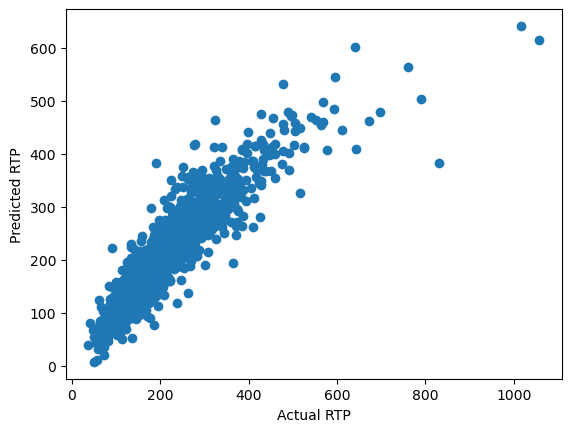

      freq_Orange  freq_Apple  freq_Grape  freq_Strawberry  freq_Mango  \
7200     0.075811    0.084947    0.121932         0.080876    0.110240   
9861     0.123081    0.048750    0.024607         0.117306    0.081603   
623      0.027751    0.061387    0.081592         0.127617    0.138601   
9401     0.036912    0.043561    0.058402         0.150794    0.094625   
9782     0.129698    0.139246    0.094982         0.035717    0.109751   
3529     0.005928    0.014527    0.119349         0.126688    0.132652   
5386     0.112079    0.024854    0.066368         0.084173    0.139695   
4350     0.100416    0.145916    0.080385         0.042994    0.068989   
4347     0.172809    0.106432    0.098863         0.153964    0.026422   
2486     0.090883    0.127489    0.082528         0.018125    0.094178   

      freq_Banana  freq_Cherry  freq_Lemon  freq_Seven  freq_Bonus  ...  \
7200     0.097879     0.109519    0.122841    0.003884    0.061846  ...   
9861     0.088373     0.027643    0

/home/korisnik/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
### Provera da li NN radi

# NNM
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluation
evaluation = model.evaluate(X_test_scaled, y_test)

print("Loss:", evaluation)
# Prediction
predictions = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Visualize the model's performance
import matplotlib.pyplot as plt
plt.scatter(y_test['RTP'], predictions[:, 0])
plt.xlabel('Actual RTP')
plt.ylabel('Predicted RTP')
plt.show()

model.save('trained_model.h5')
joblib.dump(scaler, 'scaler.pkl')

filtered_predictions = predictions[(predictions[:, 0] >= 90) & (predictions[:,0] <= 95)]
filtered_input_params = X_test[(predictions[:, 0] >= 90) & (predictions[:,0] <= 95)]
print(filtered_input_params)

In [87]:
#params for optimization
# hyperparameter ranges

params = [
    [32], # size
    [2,3], # number of hidden layers
    ['relu'], # activation function
    [0.01,0.1], #learning rates
    [100,120] # epochos
]

In [88]:


def fitness(individual):
    print(individual)
    # hypterparameters
    input_size  = X_train_scaled.shape[1]
    output_size = y_train.shape[1]

    hidden_layer_size = (individual[0])
    number_of_layers = (individual[1])
    individual_activation = individual[2]
    individual_learning_rate = individual[3]
    individual_epochs = individual[4]

    model = Sequential()
    #first layer
    model.add(Dense(units=hidden_layer_size,
                    activation = individual_activation,
                    input_shape =(input_size,)))
    #hidden layers
    for i in range(number_of_layers):
        model.add(Dense(units = hidden_layer_size,
                        activation = individual_activation
                        )) 
    #output layer
    model.add(Dense(output_size))

    model.compile(
        optimizer = Adam(learning_rate = individual_learning_rate),
        loss = 'mean_absolute_error' 
    )


    model.fit(X_train, y_train,epochs = individual_epochs,batch_size = 32,verbose = 0)


    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val,y_pred)

    return mae


In [89]:
# start

creator.create("FitnessMin", base.Fitness, weights=(-11.0,))
creator.create("Individual",list,fitness =  creator.FitnessMin)
toolbox = base.Toolbox()

#initialization
toolbox.register("hidden_layers_size", random.choice, params[0])
toolbox.register("num_hidden_layers", random.choice, params[1])
toolbox.register("activation_function", random.choice, params[2])
toolbox.register("learning_rate", random.choice, params[3])
#toolbox.register("loss_function", random.choice, params[4])
toolbox.register('epochs',random.choice,params[4])

def create_individual():
 return [toolbox.hidden_layers_size(), toolbox.num_hidden_layers(), toolbox.activation_function(), toolbox.learning_rate(),
            toolbox.epochs()]


toolbox.register("individual", tools.initIterate, creator.Individual,create_individual)
toolbox.register("population",tools.initRepeat,list, toolbox.individual)


toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(create_individual()) - 1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

## generic algorithm
best_fitness = float('inf')

population_size = 50
num_generation = 10
cxpb = 0.5
mutpb = 0.1
population = toolbox.population(n = population_size)


for g in range(num_generation):
    print("This is best fitness now ", best_fitness)
    offspring  = algorithms.varAnd(population,toolbox,cxpb=0.5,mutpb=0.4)
    fits  = map(toolbox.evaluate,offspring)
    print("Ovo su fits")
    for child, fitness in zip(offspring,fits):
        child.fitness.values = (fitness,)
        print(" fitness  ", fitness)
    
    best_individual = tools.selBest(population, k=1)[0]
    best_fitness_current = best_individual.fitness.values[0]

    print("This is best fitness now ", best_fitness_current)
    population[:] = offspring
    if best_fitness_current < best_fitness:
        best_fitness = best_fitness_current
    else:
        if g >= 4:
            break

# Get the best individual from the final population
best_individual = tools.selBest(population, k=1)[0]
best_hyperparameters = best_individual

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)




/home/korisnik/.local/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/korisnik/.local/lib/python3.11/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


This is best fitness now  inf
Ovo su fits
[32, 2, 'relu', 0.01, 120]
19/19 [==============================] - 0s 1ms/step
 fitness   19.626730569007655
[32, 3, 'relu', 0.01, 120]
19/19 [==============================] - 0s 2ms/step
 fitness   20.038349183579363
[32, 2, 'relu', 0.1, 100]
19/19 [==============================] - 0s 2ms/step
 fitness   31.965258768361757
[32, 2, 'relu', 0.1, 100]
19/19 [==============================] - 0s 2ms/step
 fitness   32.368368859506916
[32, 3, 'relu', 0.1, 120]
19/19 [==============================] - 0s 2ms/step
 fitness   32.07511800836279
[32, 3, 'relu', 1, 1]
19/19 [==============================] - 0s 1ms/step
 fitness   74.51667938993586
[32, 3, 4, 0.1, 100]


TypeError: Could not interpret activation function identifier: 4

In [ ]:
def best_network (size_units,num_of_layers,activation_f,learning_rates,num_epo):
    model = Sequential()
    model.add(Dense(64, activation=activation_f, input_shape=(X_train_scaled.shape[1],)))
    for _ in range(num_of_layers):
        model.add(Dense(64, activation=activation_f))
    model.add(Dense(5))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(X_train_scaled,y_train,epochs = num_epo,batch_size = 32,verbose = 1)

    evaluation = model.evaluate(X_test_scaled,y_test)

    print("Loss: ", evaluation)

    predictions = model.predict(X_test_scaled)

    mae = mean_squared_error(y_test,predictions)

    loaded_model.load_weights('trained_model.h5')
    scaler = joblib.load('scaler.pkl')
    print("MAE: ",mae)

    model.save('trained_model.h5')
    joblib.dump(scaler, 'scaler.pkl')

    # Load the trained model and scaler
    loaded_model = Sequential()
    loaded_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    loaded_model.add(Dense(64, activation='relu'))
    loaded_model.add(Dense(5))
    loaded_model.load_weights('trained_model.h5')
    scaler = joblib.load('scaler.pkl')

    # Generate a set of input parameters for RTP prediction
    input_params = pd.DataFrame({
        'freq_Orange': [0.1],
        'freq_Apple': [0.2],
        'freq_Grape': [0.3],
        'freq_Strawberry': [0.1],
        'freq_Mango': [0.1],
        'freq_Banana': [0.05],
        'freq_Cherry': [0.05],
        'freq_Lemon': [0.05],
        'freq_Seven': [0.05],
        'freq_Bonus': [0.1],
        'multi_Orange': [1.2],
        'multi_Apple': [1.5],
        'multi_Grape': [1.3],
        'multi_Strawberry': [1.4],
        'multi_Mango': [1.6],
        'multi_Banana': [1.3],
        'multi_Cherry': [1.4],
        'multi_Lemon': [1.2],
        'multi_Seven': [1.6]
    })

    # Scale the input parameters
    input_params_scaled = scaler.transform(input_params)

    # Make predictions
    predictions = loaded_model.predict(input_params_scaled)

    # Filter the predictions based on RTP threshold (e.g., 90%)
    filtered_predictions = predictions[predictions[:, 0] >= 90]

    # Get the corresponding input parameters for the filtered predictions
    filtered_input_params = input_params.loc[predictions[:, 0] >= 90]

    # Print the input parameters for RTP 90%
    print(filtered_input_params)